<a href="https://colab.research.google.com/github/dezlorator1/DSS/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout
from PIL import Image
from google.colab import drive
from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator

ПОДГОТОВ ОЧКА КАРТИНОК


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img = mpimg.imread('/content/drive/MyDrive/img/CutMoscow.jpg')

plt.figure()
plt.imshow(img)

In [ ]:
# Сохранение картинок ПОВЕРТИКАЛИ
chopsize = 50
infile = r"/content/drive/MyDrive/img/CutVolgogradBlack.jpg"
outfile = r"/content/drive/MyDrive/volgograd_black/cut_img_black/"
img = Image.open(infile)
width, height = img.size
count = 0 ;
# Save Chops of original image
for x0 in range(0, width, chopsize):
   for y0 in range(0, height, chopsize):
      box = (x0, y0,
             x0+chopsize if x0+chopsize <  width else  width - 1,
             y0+chopsize if y0+chopsize < height else height - 1)
      if(count<10):
        img.crop(box).save(outfile + '00'+ f'{count}' + '.jpg', "JPEG")
      elif (count <100):
        img.crop(box).save(outfile + '0'+ f'{count}' + '.jpg', "JPEG")
      else:
        img.crop(box).save(outfile + f'{count}' + '.jpg', "JPEG")
      count = count + 1

In [ ]:
  # Сохранение картинок ПОГОРИЗОНТАЛИ
  infile = r"/content/drive/MyDrive/img/CutMoscow.jpg"
  outfile = r"/content/drive/MyDrive/volgograd_color/cut_img_color/"
  chopsize = 50
  count = 0

  img = Image.open(infile)
  imgwidth, imgheight = im.size
  for i in range(0,imgheight,chopsize):
    for j in range(0,imgwidth,chopsize):
      box = (j, i, j+chopsize, i+chopsize)
      if(count<10):
        img.crop(box).save(outfile + '00'+ f'{count}' + '.jpg', "JPEG")
      elif (count <100):
        img.crop(box).save(outfile + '0'+ f'{count}' + '.jpg', "JPEG")
      else:
        img.crop(box).save(outfile + f'{count}' + '.jpg', "JPEG")
      count = count + 1

In [ ]:
files.upload()

ЗАГОТОВКА МАССИВОВ ДАННЫХ

In [ ]:
# ВХОДНЫЕ ДАННЫЕ
train_black_dir = r"/content/drive/MyDrive/img_black/"
df_black = ImageDataGenerator(rescale=1. / 255)
df_black_gen = df_black.flow_from_directory(
    train_black_dir,
    target_size=(50, 50),
    color_mode="rgb",
    class_mode='categorical',
    batch_size=960,
    shuffle=False
)
x_black, _ = df_black_gen.next()

Found 960 images belonging to 1 classes.


In [ ]:
# ВЫХОДНЫЕ ДАННЫЕ
train_color_dir = r"/content/drive/MyDrive/img_color/"
df_color = ImageDataGenerator(rescale=1. / 255)
df_color_gen = df_color.flow_from_directory(
    train_color_dir,
    target_size=(50, 50),
    color_mode="rgb",
    class_mode='categorical',
    batch_size=960,
    shuffle=False
)
y_color, _ = df_color_gen.next()

Found 960 images belonging to 1 classes.


In [ ]:
# ТЕСТОВЫЕ ВХОДНЫЕ ДАННЫЕ
test_black_dir = r"/content/drive/MyDrive/volgograd_black"
test_black1 = ImageDataGenerator(rescale=1. / 255)
test_black_gen = test_black1.flow_from_directory(
    test_black_dir,
    target_size=(50, 50),
    color_mode="rgb",
    class_mode='categorical',
    batch_size=960,
    shuffle=False
)
test_black, _ = test_black_gen.next()

Found 960 images belonging to 1 classes.


In [ ]:
# ТЕСТОВЫЕ ВЫХОДНЫЕ ДАННЫЕ
test_color_dir = r"/content/drive/MyDrive/volgograd_color"
test_color1 = ImageDataGenerator(rescale=1. / 255)
test_color_gen = test_color1.flow_from_directory(
    test_color_dir,
    target_size=(50, 50),
    color_mode="rgb",
    class_mode='categorical',
    batch_size=960,
    shuffle=False
)
test_color, _ = test_color_gen.next()

Found 960 images belonging to 1 classes.


In [ ]:
plt.figure()
plt.imshow(x_black[1])
plt.figure()
plt.imshow(y_color[1])

НА ЭТО ГОВНО СМОТРЕТЬ НЕ НАДО

А ПРИЙДЕТСЯ...

НИЕЕЕЕТ, НЕ ПРИЙДЕТСЯ ))))00)))

In [ ]:
cut_black = np.array([])
#black = np.array([])
for i in range(2):
  img = mpimg.imread('/content/drive/MyDrive/img/cut_img_black/' + f'{i}' + '.jpg')
  #black = np.append(black, img)
  cut_black = np.append(cut_black, img)
  print(cut_black)
  #cut_black.append(img)

In [ ]:
cut_color = np.array([])
for i in range(960):
    img = mpimg.imread('/content/drive/MyDrive/img/cut_img_color/' + f'{i}' + 'c.jpg')
    cut_color = np.append(cut_color, img)
    #cut_color.append(img)

In [ ]:
print(cut_black[0])

In [ ]:
plt.figure()
plt.imshow(cut_black[0])
#plt.figure()
#plt.imshow(cut_color[0])


In [ ]:
for i in range(960):
  cut_black[i] = cut_black[i] / 255
  cut_color[i] = cut_color[i] / 255

НЕЙРОНКА


In [ ]:
model = keras.Sequential([
    Conv2D(filters=3, kernel_size = 1, input_shape=(50, 50, 3)),
    Dense(1200, activation='relu'),
    Dropout(0.4),
    Dense(150, activation='relu'),
    Conv2D(filters=3, kernel_size = 1, input_shape=(50, 50, 3))
])


In [ ]:
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 3)         12        
_________________________________________________________________
dense (Dense)                (None, 50, 50, 1200)      4800      
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 1200)      0         
_________________________________________________________________
dense_1 (Dense)              (None, 50, 50, 150)       180150    
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 3)         453       
Total params: 185,415
Trainable params: 185,415
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.fit(x_black, y_color, batch_size=32, epochs=5, validation_split=0.10)

Epoch 1/5
27/27 [==============================] - 79s 3s/step - loss: 0.8475 - accuracy: 0.5133 - val_loss: 0.5101 - val_accuracy: 0.8271
Epoch 2/5
27/27 [==============================] - 76s 3s/step - loss: 0.5472 - accuracy: 0.8104 - val_loss: 0.4970 - val_accuracy: 0.8271
Epoch 3/5
27/27 [==============================] - 75s 3s/step - loss: 0.5231 - accuracy: 0.8254 - val_loss: 0.4934 - val_accuracy: 0.8271
Epoch 4/5
27/27 [==============================] - 74s 3s/step - loss: 0.5261 - accuracy: 0.8137 - val_loss: 0.4897 - val_accuracy: 0.8271
Epoch 5/5
27/27 [==============================] - 74s 3s/step - loss: 0.5187 - accuracy: 0.8153 - val_loss: 0.4882 - val_accuracy: 0.8271


In [ ]:
model.evaluate(test_black, test_color)

In [ ]:
predictions = model.predict(test_black)


In [ ]:
img_num = 551
plt.figure()
plt.imshow(test_black[img_num])
plt.figure()
plt.imshow(test_color[img_num])
plt.figure()
plt.imshow(predictions[img_num])


#img = Image.new('RGB', (2400, 1000))
#for i in range(20):
#  for j in range(47):
#    img.paste(predictions[j+i*48], (50*j,50*i))
#    img.show()

#w=50
#h=50
#fig=plt.figure(figsize=(48, 20))
#columns = 48
#rows = 20
#for i in range(47):
#  for j in range(20):
#    img = predictions[j+i*20]
#    fig.add_subplot(rows, columns, j+i*20+1)
#    plt.imshow(img)
#plt.show()

In [ ]:
w=50
h=50
fig=plt.figure(figsize=(48, 20))
columns = 48
rows = 20
for i in range(47):
 for j in range(20):
   img = test_color[j+i*20]
   fig.add_subplot(rows, columns, j+i*20+1)
   plt.imshow(img)
plt.show()

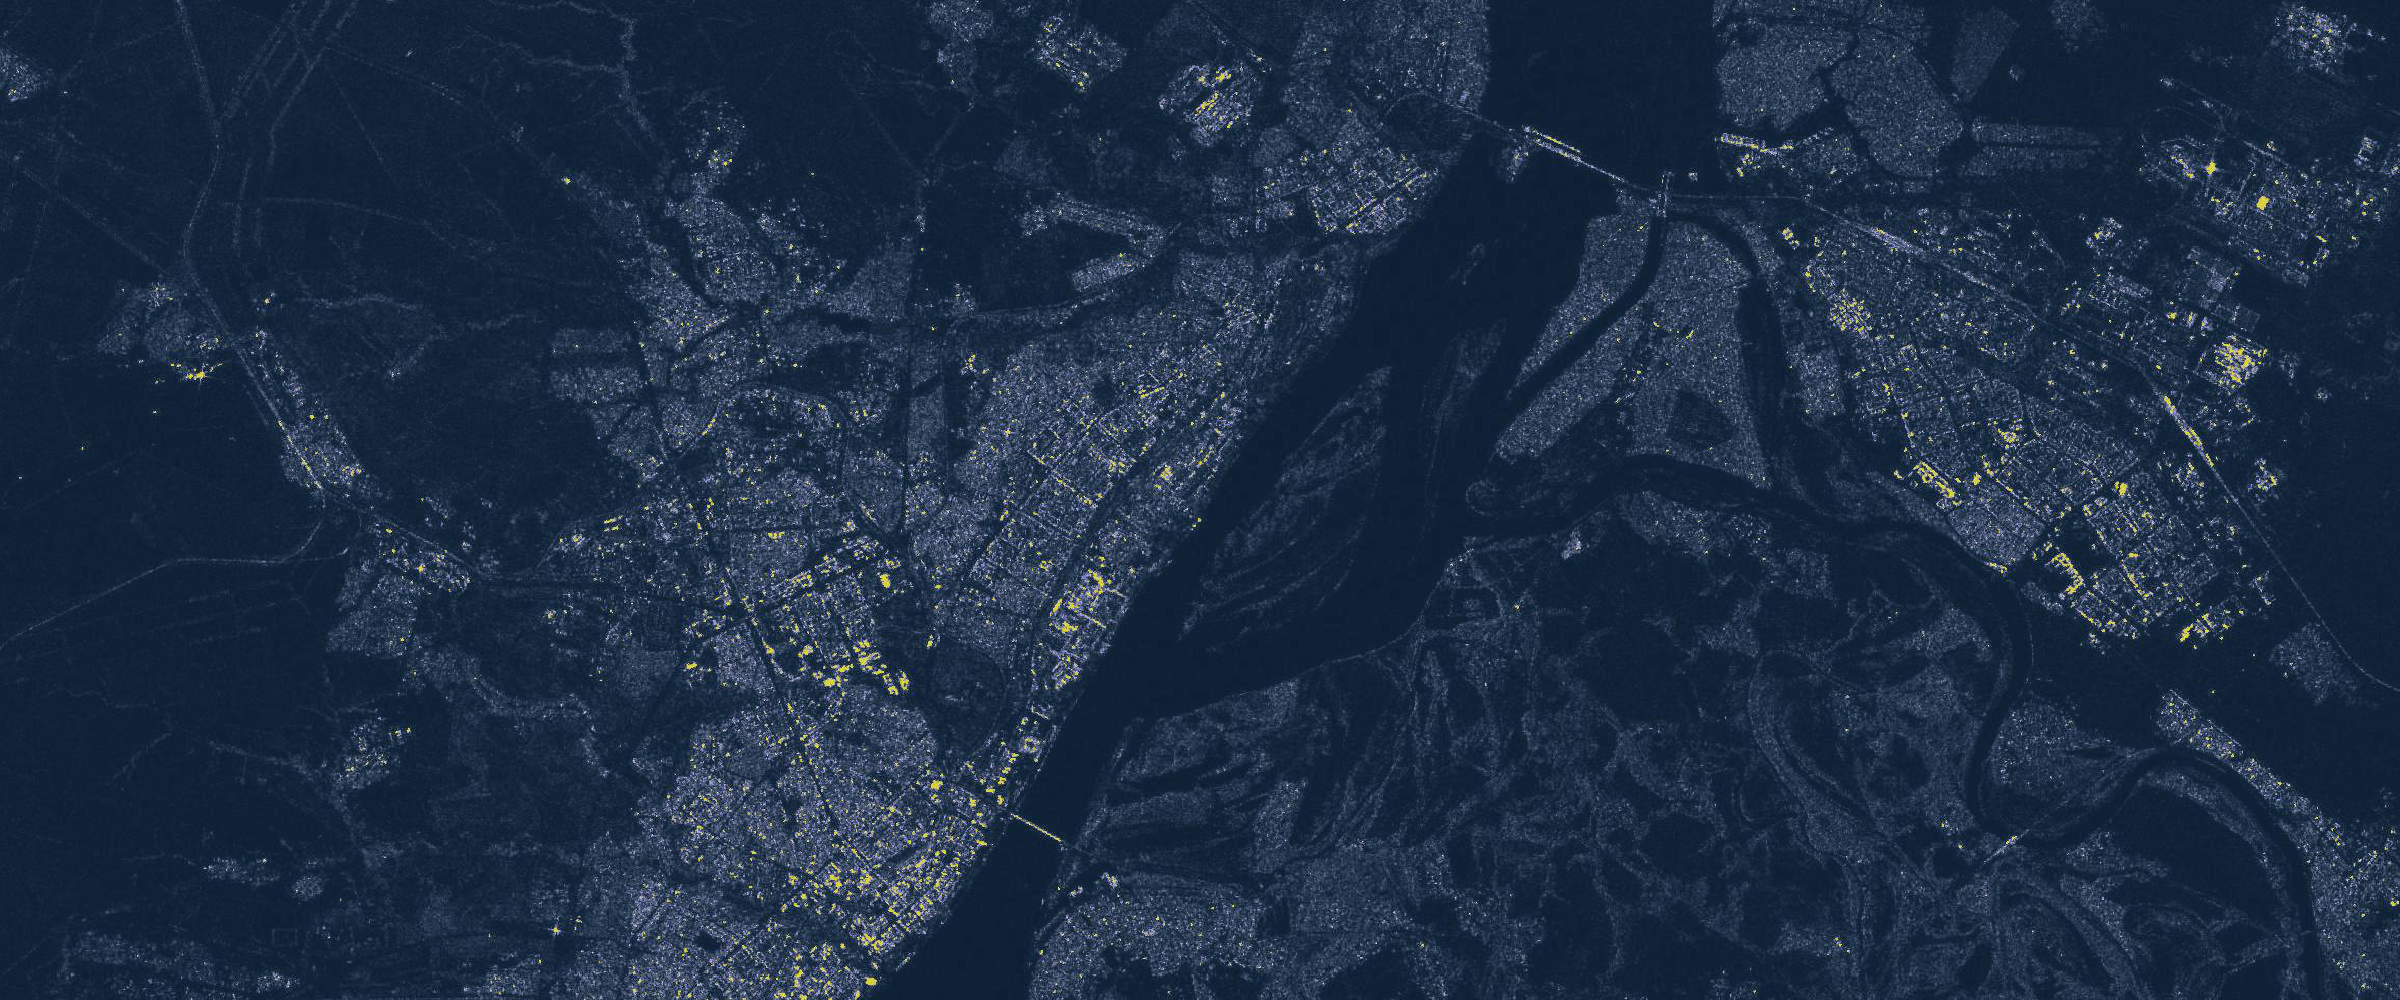

In [ ]:
img = Image.new('RGB', (2400, 1000))
for i in range(20):
 for j in range(48):
    b = BytesIO()
    tmp = np.array(Image.fromarray((predictions[i+j*20] * 255).astype(np.uint8)).resize((50, 50)).convert('RGB'))
    tmp_img = Image.fromarray(tmp)
    tmp_img.save(b,format="JPEG")
    tmp1 = Image.open(b)
    img.paste(tmp1, (50*j,50*i))
    b.close()
img

In [ ]:
from io import BytesIO  

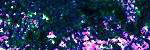

In [ ]:
#рабочая хуита
img = Image.new('RGB', (150, 50))

for i in range(3):
  b = BytesIO()
  tmp = np.array(Image.fromarray((y_color[i] * 255).astype(np.uint8)).resize((50, 50)).convert('RGB'))
  tmp_img = Image.fromarray(tmp)
  tmp_img.save(b,format="JPEG")
  tmp1 = Image.open(b)
  img.paste(tmp1, (50*i,0))
  b.close()


img




In [ ]:
# Это говно конвертирует фото из массива в Image
tmp = np.array(Image.fromarray((test_color[0] * 255).astype(np.uint8)).resize((50, 50)).convert('RGB'))
image = Image.fromarray(tmp)
image
print(type(image))
puk = Image.open(r'/content/drive/MyDrive/img_color/cut_img_color/000.jpg')
print(type(puk))

<class 'PIL.Image.Image'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>


loss='binary_crossentropy', 81%

model = keras.Sequential([
    Conv2D(filters=3, kernel_size = 1, input_shape=(50, 50, 3)),
    Dense(1500, activation='relu'),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Conv2D(filters=3, kernel_size = 1, input_shape=(50, 50, 3))
]) 0.8474